In [ ]:
!nvidia-smi

Sun Sep 27 12:56:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#load the dataset
vid = pd.read_csv("/content/drive/My Drive/video/Training.csv")
#show the data
vid.head()

,name,ori_file,size,bitrate,size_diff,bitrate_diff,sizediff/ori,bitratediff/ori,Condition,Cls
0,0GHpTnbnTZs_1100kbps_0001.mp4,0GHpTnbnTZs,36.4,1381,11.9,321,0.246377,0.188602,1100,0
1,0GHpTnbnTZs_1100kbps_001.mp4,0GHpTnbnTZs,37.3,1414,11.0,288,0.227743,0.169213,1100,0
2,0GHpTnbnTZs_1100kbps_0025.mp4,0GHpTnbnTZs,37.5,1419,10.8,283,0.223602,0.166275,1100,0
3,0GHpTnbnTZs_1100kbps_005.mp4,0GHpTnbnTZs,38.0,1440,10.3,262,0.213251,0.153937,1100,0
4,0GHpTnbnTZs_1100kbps_01.mp4,0GHpTnbnTZs,37.2,1411,11.1,291,0.229814,0.170975,1100,0


In [ ]:
from sklearn.model_selection import train_test_split as split
train, test = split(vid, test_size = 0.20)
print (train.shape)
print (test.shape)

(288, 10)
(72, 10)


In [ ]:
from keras.utils import np_utils
X_train = train[['size','bitrate','size_diff', 'bitrate_diff']]
y_train = train.Cls
X_test = test[['size','bitrate','size_diff', 'bitrate_diff']]
y_test = test.Cls

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import CSVLogger

model = Sequential()
model.add(Dense(12, input_dim=4,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='RMSProp',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = [
    ModelCheckpoint('model_best.hdf5',
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
]
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[checkpoint],epochs=250, batch_size=3)

Epoch 1/250
83/96 [========================>.....] - ETA: 0s - loss: 17.7957 - accuracy: 0.1325
Epoch 00001: val_accuracy improved from -inf to 0.13889, saving model to model_best.hdf5
96/96 [==============================] - 0s 4ms/step - loss: 16.2614 - accuracy: 0.1389 - val_loss: 5.0494 - val_accuracy: 0.1389
Epoch 2/250
88/96 [==========================>...] - ETA: 0s - loss: 4.2103 - accuracy: 0.1326
Epoch 00002: val_accuracy did not improve from 0.13889
96/96 [==============================] - 0s 3ms/step - loss: 4.1622 - accuracy: 0.1319 - val_loss: 3.5187 - val_accuracy: 0.1389
Epoch 3/250
79/96 [=======================>......] - ETA: 0s - loss: 3.1788 - accuracy: 0.1350
Epoch 00003: val_accuracy did not improve from 0.13889
96/96 [==============================] - 0s 3ms/step - loss: 3.0766 - accuracy: 0.1319 - val_loss: 3.3151 - val_accuracy: 0.0972
Epoch 4/250
84/96 [=========================>....] - ETA: 0s - loss: 2.8920 - accuracy: 0.1151
Epoch 00004: val_accuracy did no

In [ ]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

#model.load_weights('model_best.hdf5')
#model.compile(optimizer='RMSProp',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
stop = EarlyStopping(monitor='val_accuracy',  patience=70, verbose=0, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=25, verbose=1,
    factor=0.5,
    min_lr = 0.00001,
    cooldown=0
)
checkpoint = [ModelCheckpoint('model_best.hdf5',monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
]
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[checkpoint,reduce_lr,stop],epochs=500, batch_size=3)

Epoch 1/500
87/96 [==========================>...] - ETA: 0s - loss: 0.6995 - accuracy: 0.6935
Epoch 00001: val_accuracy improved from -inf to 0.68056, saving model to model_best.hdf5
96/96 [==============================] - 0s 3ms/step - loss: 0.7139 - accuracy: 0.6910 - val_loss: 0.9799 - val_accuracy: 0.6806
Epoch 2/500
91/96 [===========================>..] - ETA: 0s - loss: 0.8903 - accuracy: 0.6996
Epoch 00002: val_accuracy improved from 0.68056 to 0.70833, saving model to model_best.hdf5
96/96 [==============================] - 0s 3ms/step - loss: 0.8920 - accuracy: 0.6910 - val_loss: 0.7394 - val_accuracy: 0.7083
Epoch 3/500
90/96 [===========================>..] - ETA: 0s - loss: 0.7865 - accuracy: 0.7000
Epoch 00003: val_accuracy did not improve from 0.70833
96/96 [==============================] - 0s 3ms/step - loss: 0.7693 - accuracy: 0.7083 - val_loss: 1.0952 - val_accuracy: 0.5972
Epoch 4/500
88/96 [==========================>...] - ETA: 0s - loss: 0.8588 - accuracy: 0.70

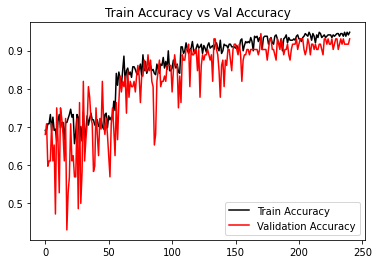

In [ ]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='black')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.show()

In [ ]:
x = vid[['size','bitrate','size_diff', 'bitrate_diff']]
y = vid.Cls

In [ ]:
model.load_weights('model_best.hdf5')
model.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
pr = model.predict(x, batch_size=3, verbose=0, steps=None)

In [ ]:
pp = pr.argmax(axis=1)

In [ ]:
yp = []
for i in pp:
  yp.append(1100+i*100)

In [ ]:
print(yp)

[1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1500, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 150

In [ ]:
yt = []
for i in y:
  yt.append(1100+i*100)

In [ ]:
print(yt)

[1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 150

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(yt, yp)

4.444444444444445

In [ ]:
issue = pd.read_csv("/content/received.csv")

In [ ]:
issue.head()

,name,FileSize,BitRate,size_diff,B_diff
0,0.mp4,33.9,1388,7.3,168
1,1.mp4,35.2,1441,6.0,115
2,2.mp4,36.0,1473,5.2,83
3,3.mp4,35.9,1469,5.3,87
4,4.mp4,36.0,1473,5.2,83


In [ ]:
X_issue = issue[['FileSize','BitRate','size_diff', 'B_diff']]

In [ ]:
pr = model.predict(X_issue, batch_size=3, verbose=0, steps=None)

In [ ]:
pp = pr.argmax(axis=1)

In [ ]:
pp

array([1, 2, 2, 2, 2, 0, 1, 4, 5, 2])

In [ ]:
yp = []
for i in pp:
  yp.append(1100+i*100)
yp

[1200, 1300, 1300, 1300, 1300, 1100, 1200, 1500, 1600, 1300]